In [1]:
import torch
import torchaudio
from random import randint
from IPython.display import Audio
from helpers.path_utils import get_base_dir
from helpers.audio_utils import trim_audio, resample_audio, standard_scale
from helpers.plot import compare_audios, plot_wavelet_spectrogram, plot_audio_fft


In [2]:
base_dir = get_base_dir()
HEARTBEATS_FILE_NAME = "000-20240910-1753.pt"
heartbeats_dir = base_dir.joinpath("data", "model", "original", HEARTBEATS_FILE_NAME)

mobile, stethos, heartbeats_sample_rate = torch.load(heartbeats_dir)
mobile.shape, stethos.shape, heartbeats_sample_rate

(torch.Size([1, 456800]), torch.Size([1, 456800]), 4000)

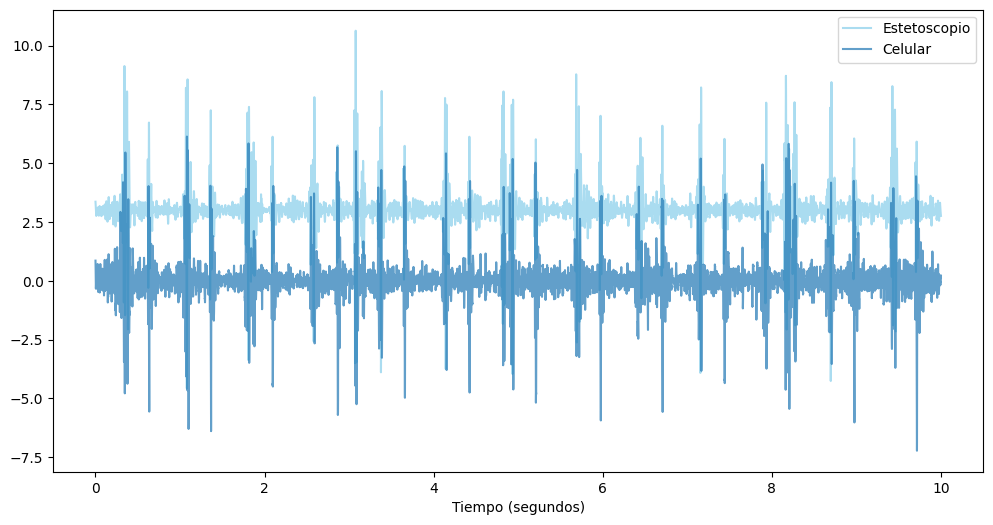

In [3]:
START_AT = 3
END_AT = START_AT + 10

mobile_snippet = trim_audio(mobile, heartbeats_sample_rate, START_AT, END_AT)
stethos_snippet = trim_audio(stethos, heartbeats_sample_rate, START_AT, END_AT)

mobile_snippet = standard_scale(mobile_snippet)
stethos_snippet = standard_scale(stethos_snippet)

compare_audios(mobile_snippet.squeeze(), stethos_snippet.squeeze(), heartbeats_sample_rate, offset=3)

In [4]:
noise_dir = base_dir.joinpath("data", "hospital-ambient-noise", "original")
noises = list(noise_dir.glob("*.wav"))

total_noises = len(noises)
total_noises, noises[:3]

(562,
 [WindowsPath('C:/Users/efrai/OneDrive/Desktop/EF/Education/MCC_UAG/Tesis/coratech/data/hospital-ambient-noise/original/seg_1.wav'),
  WindowsPath('C:/Users/efrai/OneDrive/Desktop/EF/Education/MCC_UAG/Tesis/coratech/data/hospital-ambient-noise/original/seg_10.wav'),
  WindowsPath('C:/Users/efrai/OneDrive/Desktop/EF/Education/MCC_UAG/Tesis/coratech/data/hospital-ambient-noise/original/seg_100.wav')])

In [5]:
choosen_one = randint(0, total_noises)
print(f"#{choosen_one + 1} / {total_noises}")

noise, noise_sample_rate = torchaudio.load(str(noises[choosen_one]))
print(f"Noise sample rate: {noise_sample_rate}")

#98 / 562
Noise sample rate: 44100


New noise sample rate: 4000


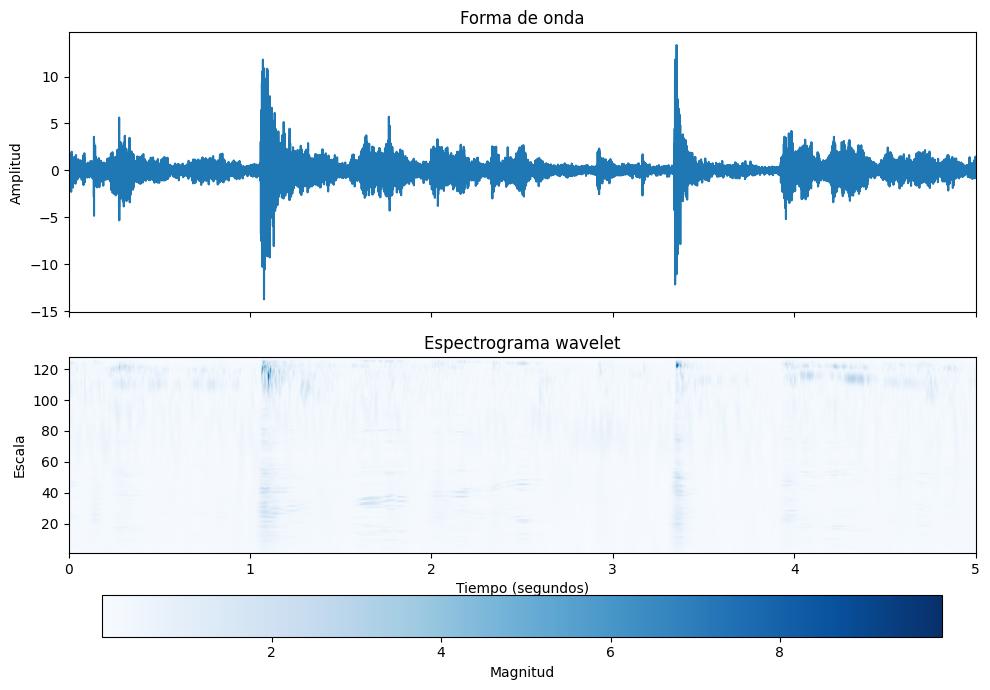

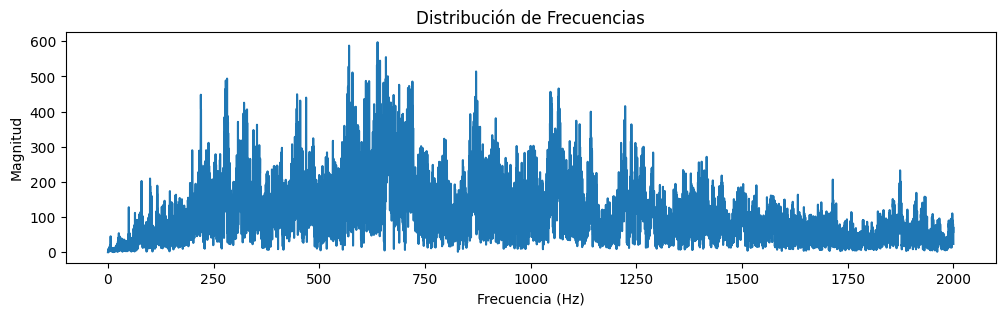

In [6]:
noise, noise_sample_rate = resample_audio(noise, noise_sample_rate, heartbeats_sample_rate)
noise = standard_scale(noise)
print(f"New noise sample rate: {noise_sample_rate}")

plot_wavelet_spectrogram(noise.numpy(), noise_sample_rate, downsample_factor=1)
plot_audio_fft(noise.numpy(), noise_sample_rate)
Audio(noise, rate=noise_sample_rate, autoplay=True)

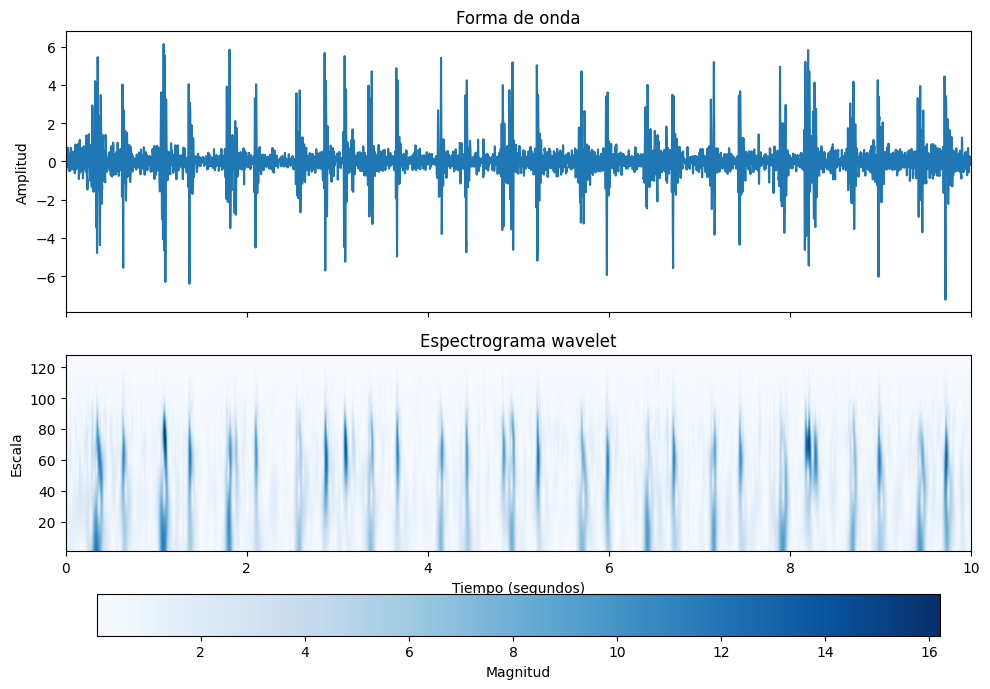

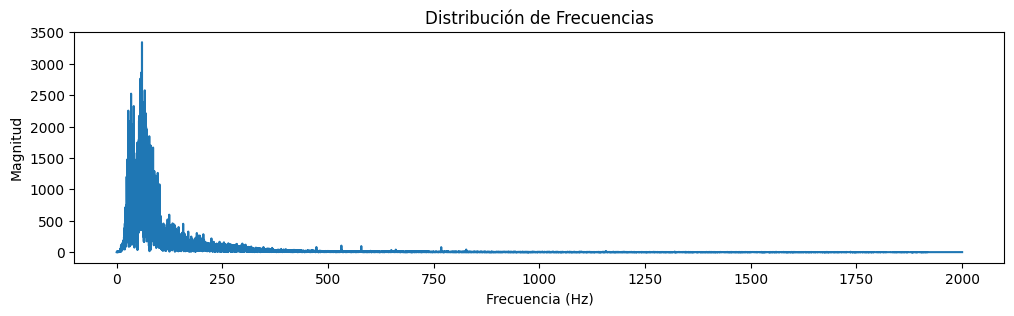

In [7]:
plot_wavelet_spectrogram(mobile_snippet.numpy(), heartbeats_sample_rate, downsample_factor=1)
plot_audio_fft(mobile_snippet.numpy(), heartbeats_sample_rate)
Audio(mobile_snippet, rate=heartbeats_sample_rate, autoplay=True)

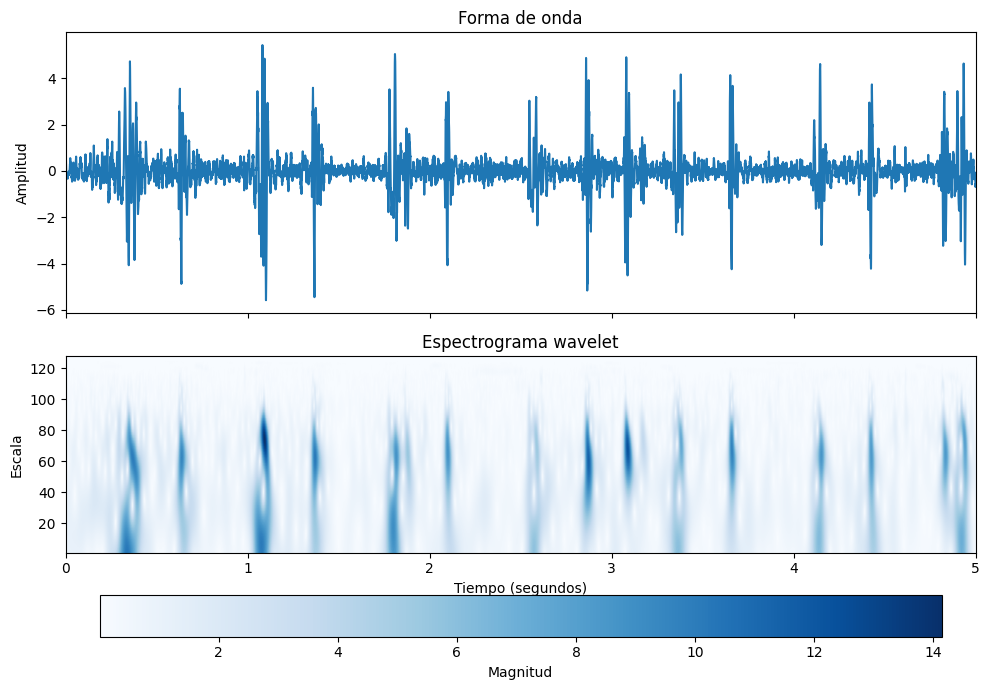

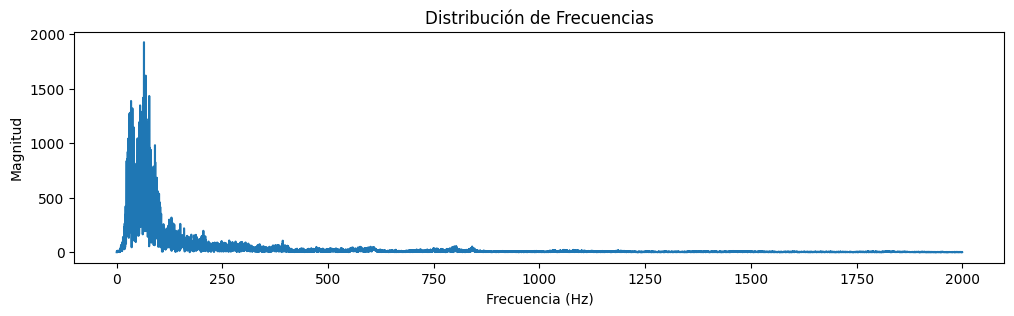

In [11]:
NOISE_VOL = 0.1

mobile_snippet_noisy = noise*NOISE_VOL + mobile_snippet*(1 - NOISE_VOL)

plot_wavelet_spectrogram(mobile_snippet_noisy.numpy(), heartbeats_sample_rate, downsample_factor=1)
plot_audio_fft(mobile_snippet_noisy.numpy(), heartbeats_sample_rate)
Audio(mobile_snippet_noisy, rate=heartbeats_sample_rate, autoplay=True)